# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

## Get the Data


In [44]:
# !conda install pandas-datareader

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
sns.set_style('whitegrid')

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
# if the following doesnt work, then use this to get the bank_stocks data frame
# bank_stocks = pd.read_pickle('all_banks')
# bank_stocks.head()

In [3]:
start = datetime.datetime(2006,1,1) # this is the start date
end = datetime.datetime(2016,1,1)



In [4]:
# Bank of America
BAC = data.DataReader('BAC', 'stooq', start, end)

# Citi Group
C = data.DataReader('C', 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader('GS', 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'stooq', start, end)


In [5]:
BAC.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,15.199,15.251,15.036,15.036,52684386.0
2015-12-30,15.369,15.404,15.225,15.235,39201481.0
2015-12-29,15.413,15.503,15.333,15.437,51069935.0


In [6]:
C.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,45.121,45.397,44.843,44.843,13007619.0
2015-12-30,45.790,45.876,45.279,45.320,10111402.0
2015-12-29,45.719,46.118,45.700,45.911,11717274.0


**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers) # we concatinate along columns since they all share the same index

In [9]:
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04  40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05  40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06  40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09  40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

                                       ...      MS                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04  416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05  416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06  414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09  415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04  9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05  7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06  8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09  5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

**Set the column name levels.**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

# Exploratory Data Analysis (EDA)

**What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.head(1)

Bank Ticker     BAC                                          C          \
Stock Info     Open    High     Low   Close      Volume   Open    High   
Date                                                                     
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.8  425.04   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  

[1 rows x 30 columns]

In [13]:
bank_stocks['BAC']

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,40.601,40.823,39.934,40.739,18832700.0
2006-01-04,40.671,40.881,40.194,40.306,20521415.0
2006-01-05,40.306,40.524,40.083,40.359,17129894.0
2006-01-06,40.496,40.591,40.109,40.297,14554711.0
2006-01-09,40.428,40.645,40.116,40.324,18050003.0
...,...,...,...,...,...
2015-12-24,15.474,15.529,15.386,15.430,32876023.0
2015-12-28,15.386,15.395,15.170,15.304,46716506.0
2015-12-29,15.413,15.503,15.333,15.437,51069935.0


In [14]:
bank_stocks['BAC']['Close']

Date
2006-01-03    40.739
2006-01-04    40.306
2006-01-05    40.359
2006-01-06    40.297
2006-01-09    40.324
               ...  
2015-12-24    15.430
2015-12-28    15.304
2015-12-29    15.437
2015-12-30    15.235
2015-12-31    15.036
Name: Close, Length: 2517, dtype: float64

In [15]:
bank_stocks['BAC']['Close'].max()

47.505

In [16]:
# remember tickers is a list of ticks we made above
for ticks in tickers:
    print(bank_stocks[ticks]['Close'].max())
    

47.505
485.57
210.17
58.967
60.623999999999995
48.198


In [17]:
# alternatively:
bank_stocks.xs(key='Close', axis=1, level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,40.739,424.290,109.25,29.892,39.582,23.497
2006-01-04,40.306,416.440,107.76,29.465,39.614,23.225
2006-01-05,40.359,418.490,107.72,29.556,39.722,23.202
2006-01-06,40.297,418.490,109.22,29.765,39.762,23.333
2006-01-09,40.324,416.530,110.53,30.248,40.178,23.333
...,...,...,...,...,...,...
2015-12-24,15.430,45.674,165.45,56.443,28.034,45.756
2015-12-28,15.304,45.389,164.67,56.257,27.765,45.642
2015-12-29,15.437,45.911,166.39,56.838,28.093,46.148


In [18]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     47.505
C      485.570
GS     210.170
JPM     58.967
MS      60.624
WFC     48.198
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [19]:
returns = pd.DataFrame() # we have an empty data frame called returns
# this data frame will contain the returns of each banks stock

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [20]:
# remember tickers is a list of ticks we made above
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [21]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018501,-0.013638,-0.014285,0.000808,-0.011576
2006-01-05,0.001315,0.004923,-0.000371,0.003088,0.002726,-0.000990
2006-01-06,-0.001536,0.000000,0.013925,0.007071,0.001007,0.005646
2006-01-09,0.000670,-0.004684,0.011994,0.016227,0.010462,0.000000


In [22]:
# there's no percent return on the first day since there's nothing in the past to compare it to

**Create a pairplot using seaborn of the returns dataframe.**

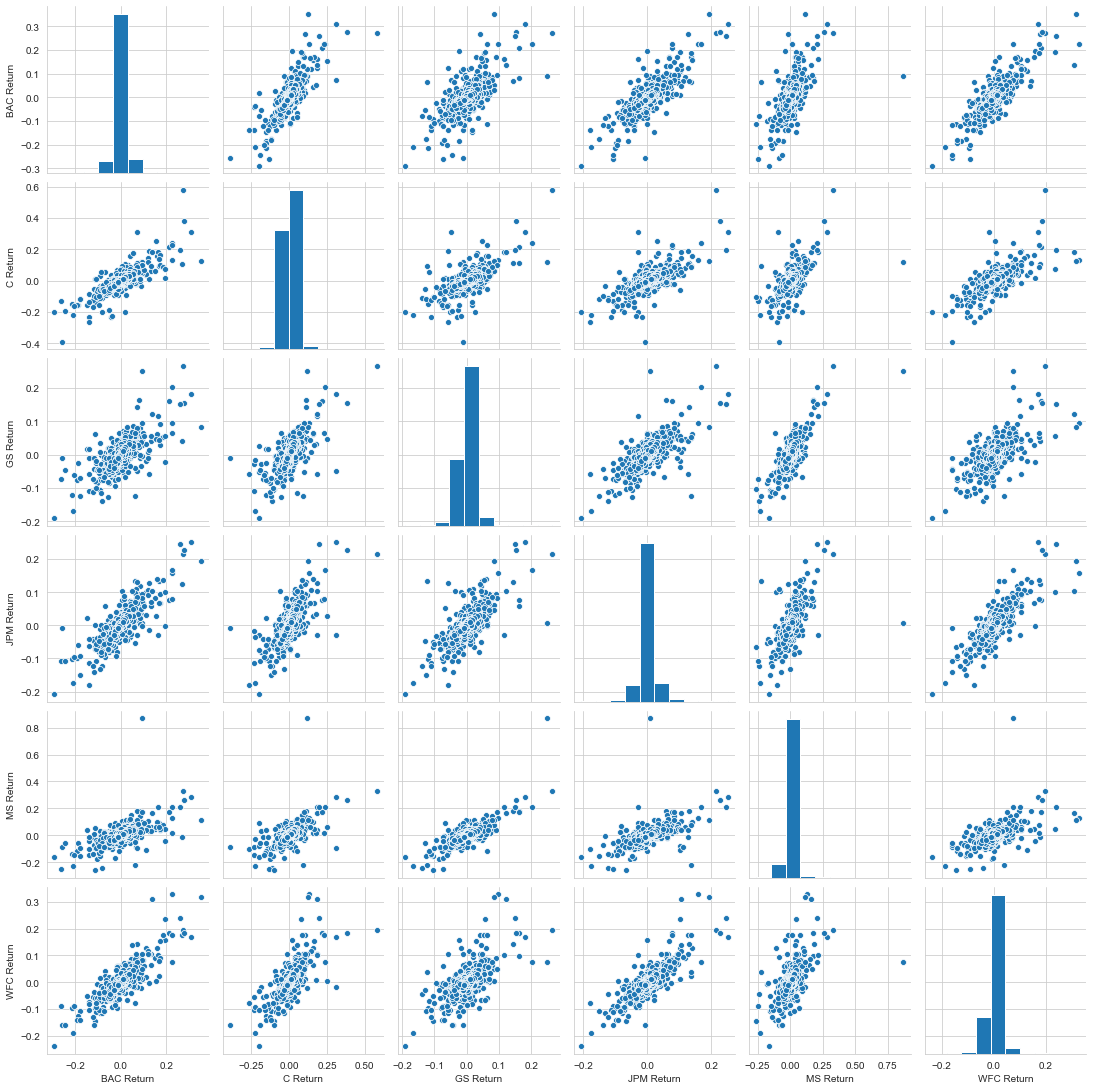

In [51]:
sns.pairplot(returns[1:])

In [26]:
# using the pick file:

df = pd.read_pickle('all_banks')

new_returns = pd.DataFrame()

for tick in tickers:
    new_returns[tick+' Return'] = df[tick]['Close'].pct_change()

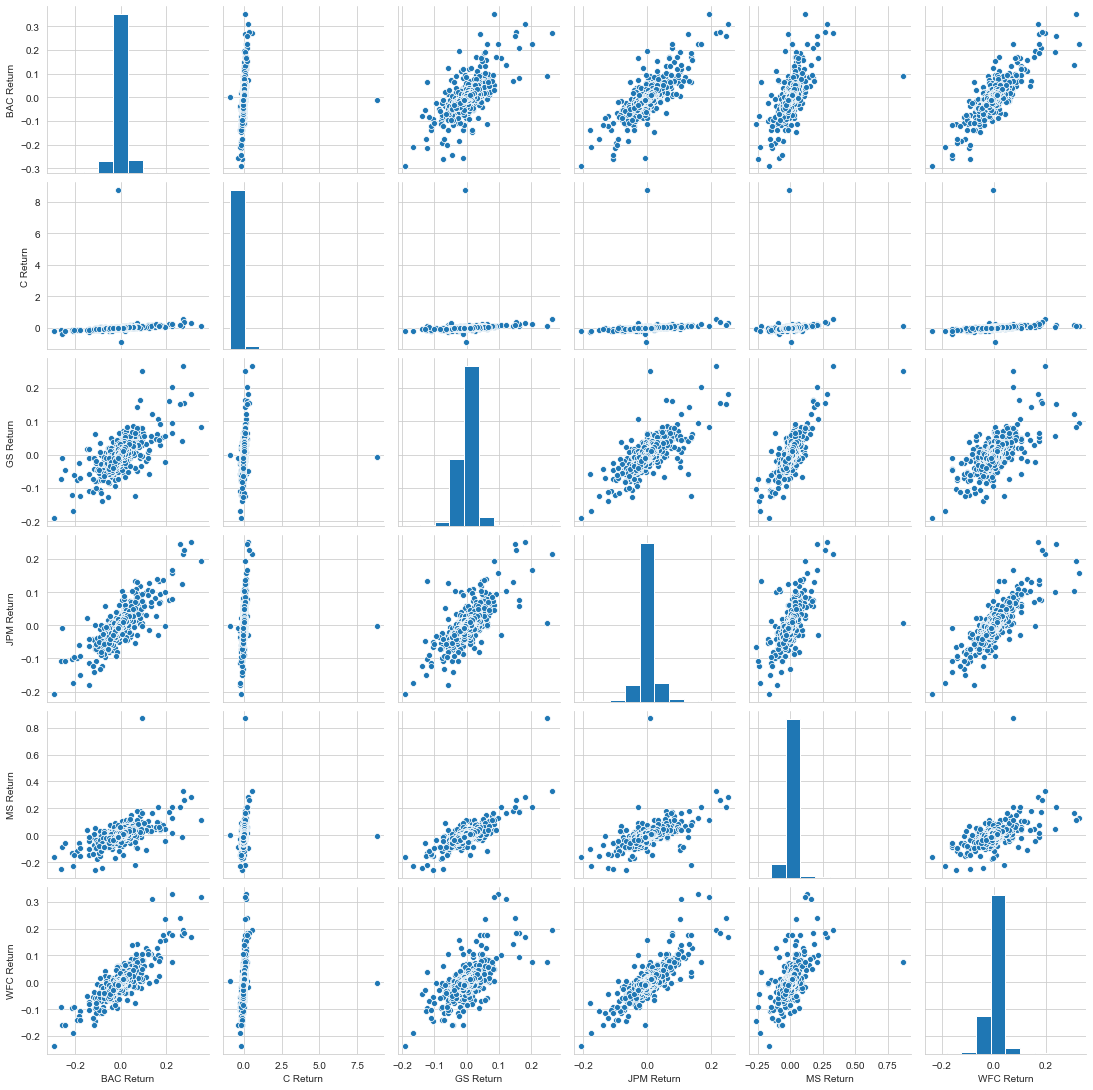

In [50]:
sns.pairplot(new_returns[1:])

In [ ]:
# On this pairplot, using the picke file, we see that the C Return for Citi Group stands out.
# This is because Citi Group had a large financial crash in around November 2008

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [28]:
new_returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [29]:
new_returns.min()

BAC Return   -0.289694
C Return     -0.899107
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [30]:
# we want the dates when these happened:

In [34]:
new_returns['BAC Return'].idxmin()

Timestamp('2009-01-20 00:00:00')

In [36]:
new_returns.idxmin()
# this returns the lowest single day mins

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
# the worst drops occured on ~ 20-Jan-2008 (which was Obama's inogural data)

In [37]:
new_returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
# we notice that Citi Groups min is on 06-May-2011 and the max is on 09-May-2011

In [ ]:
# This was because Citi Group anounced the 'reverse stock split' on this date (09-May-2011)

**Take a look at the standard deviation of the returns.**

In [38]:
new_returns.std()
# Citi Group is the riskiest overall

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [44]:
new_returns.loc['2015-01-01':'2015-12-31'].std()
# for 2015, we see that Citi Group is no longer the highest risk
# Now the riskiest would be Morgan Stanley 

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

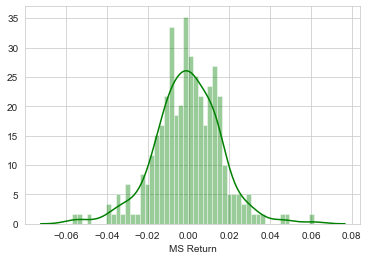

In [49]:
sns.distplot(new_returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

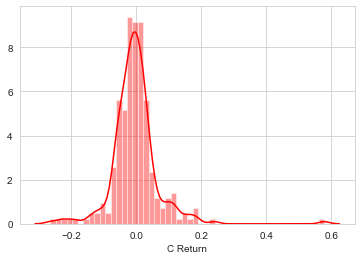

In [53]:
sns.distplot(new_returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

# here the std is stretched out to 0.6 (10 times as much)

____
# More Visualization


### Imports

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time.**

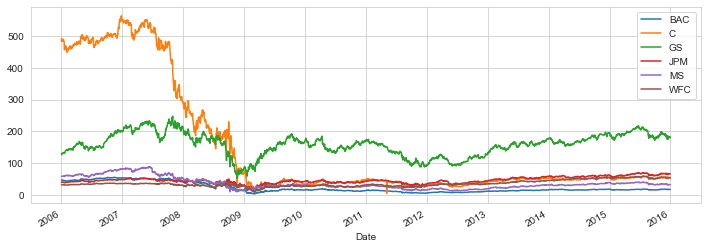

In [57]:
for tick in tickers:
    df[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

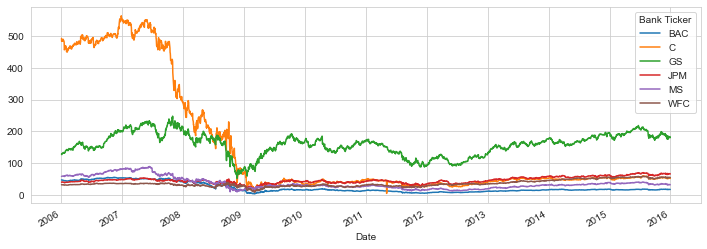

In [61]:
df.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))

In [63]:
df.xs(key='Close', axis=1, level='Stock Info').iplot()
# via cufflinks

## Moving Averages

Analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

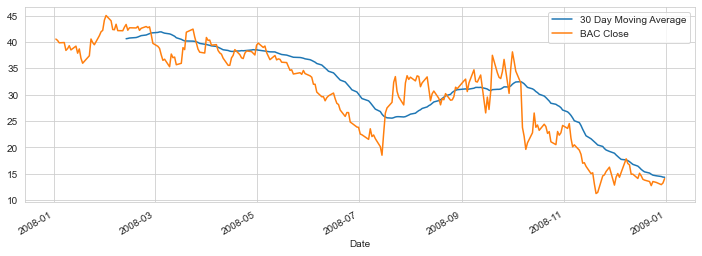

In [74]:
plt.figure(figsize=(12,4))

df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')

plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

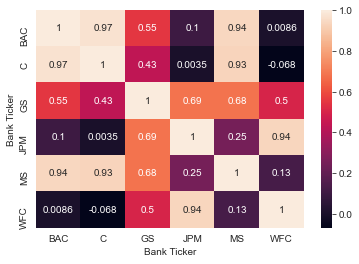

In [78]:
sns.heatmap(df.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

**Use seaborn's clustermap to cluster the correlations together:**

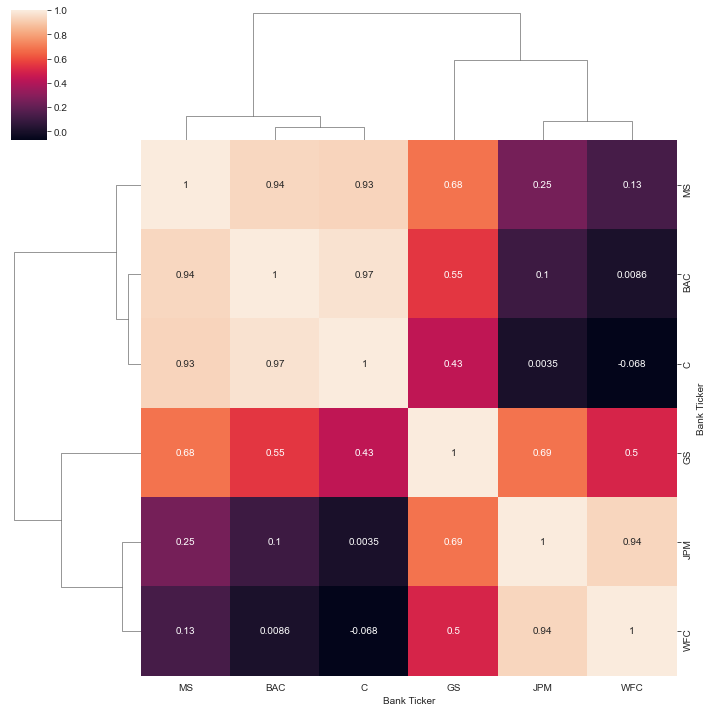

In [79]:
sns.clustermap(df.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

# Part 2

Create Technical Analysis plots.

In [80]:
close_corr = df.xs(key='Close', axis=1, level='Stock Info').corr()

In [81]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


In [83]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [86]:
bac15 = df['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']

In [88]:
bac15.head()

Stock Info,Open,High,Low,Close
Date,,,,
2015-01-02,17.99,18.03,17.68,17.90
2015-01-05,17.78,17.81,17.29,17.38
2015-01-06,17.42,17.44,16.78,16.86
2015-01-07,17.14,17.18,16.87,16.94
2015-01-08,17.16,17.34,17.10,17.29


In [89]:
bac15.iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [91]:
df['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [93]:
df['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')